In [28]:
#Importing Libary
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


### PreProcessing

In [29]:
df = pd.read_csv('./london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [31]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [32]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


### Soal-Soal

#### Wilayah mana yang memiliki kejahatan yang paling tinggi tahun 2015? (Pie plot)

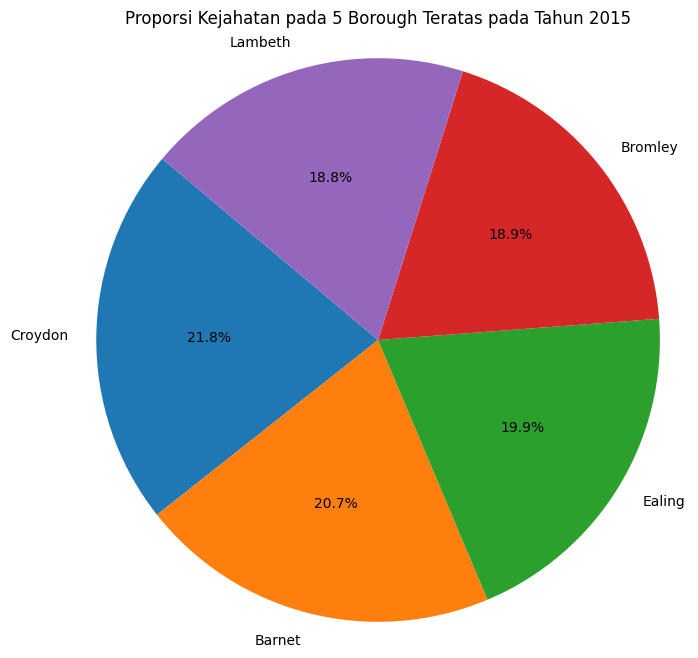

In [33]:
# Konversi kolom "year" ke tipe data datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Filter data untuk tahun 2015
tahun_2015 = df[df['year'].dt.year == 2015]

# Hitung jumlah kasus per "borough" pada tahun 2015
kasus_per_borough = tahun_2015['borough'].value_counts()

# Ambil 5 teratas
top_5_boroughs = kasus_per_borough.head(5)

# Buat pie plot untuk 5 teratas
plt.figure(figsize=(8, 8))
plt.pie(top_5_boroughs, labels=top_5_boroughs.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Kejahatan pada 5 Borough Teratas pada Tahun 2015')

# Tampilkan pie plot
plt.axis('equal')  # Agar lingkaran tampak sempurna
plt.show()

Bisa disimpulkan bahwa wilayah yang memiliki kejahatan terbanyak pada tahun 2015 adalah Barnet

#### Apa wilayah teratas dengan jumlah kasus kejahatan tertinggi? (Area Plot)

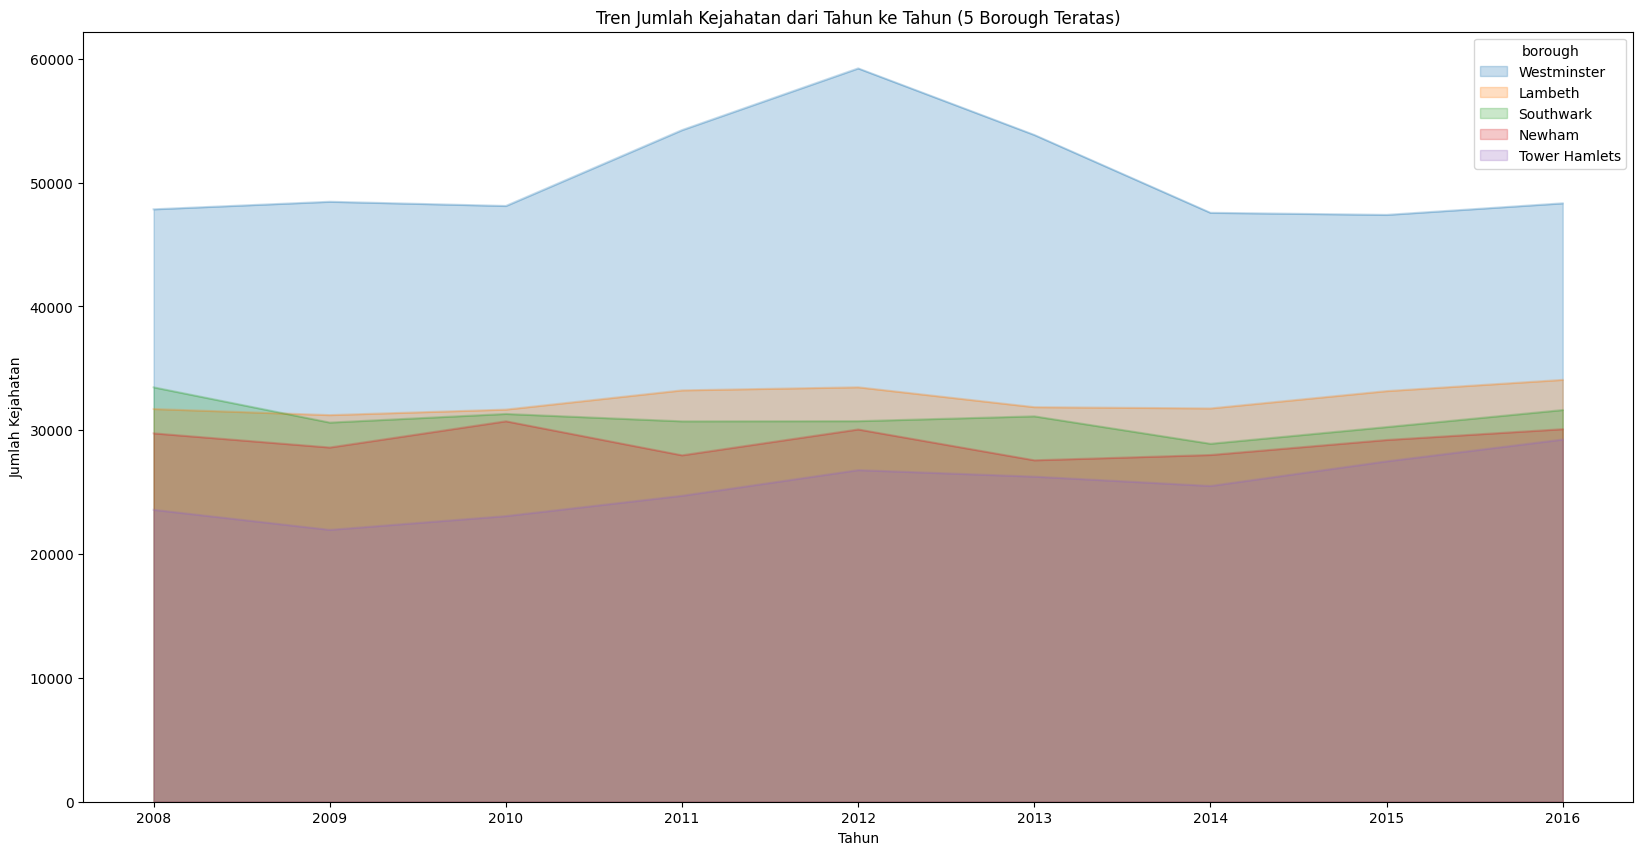

In [34]:
# Konversi kolom "year" ke tipe data datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Group data berdasarkan tahun dan borough, dan hitung jumlah kasus kejahatan per tahun
tahunly_crime_borough = df.groupby([df['year'].dt.year, 'borough'])['value'].sum().unstack().fillna(0)

# Ambil 5 borough teratas berdasarkan jumlah kasus kejahatan terakhir (tahun terakhir dalam data)
top_5_boroughs = tahunly_crime_borough.iloc[-1].sort_values(ascending=False).head(5).index

# Filter data untuk 5 borough teratas
tahunly_crime_top5 = tahunly_crime_borough[top_5_boroughs]

# Buat area plot
tahunly_crime_top5.plot(kind='area', alpha=0.25, stacked=False, figsize=(20, 10))
plt.title('Tren Jumlah Kejahatan dari Tahun ke Tahun (5 Borough Teratas)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.show()

Dari visualisasi diatas bisa dilihat bahwa tren jumlah kejahatan tertinggi terdapat pada wilayah Westmister

#### Pada wilayah Westminster apa kejahatan yang paling sering dilakukan? (Histogram)

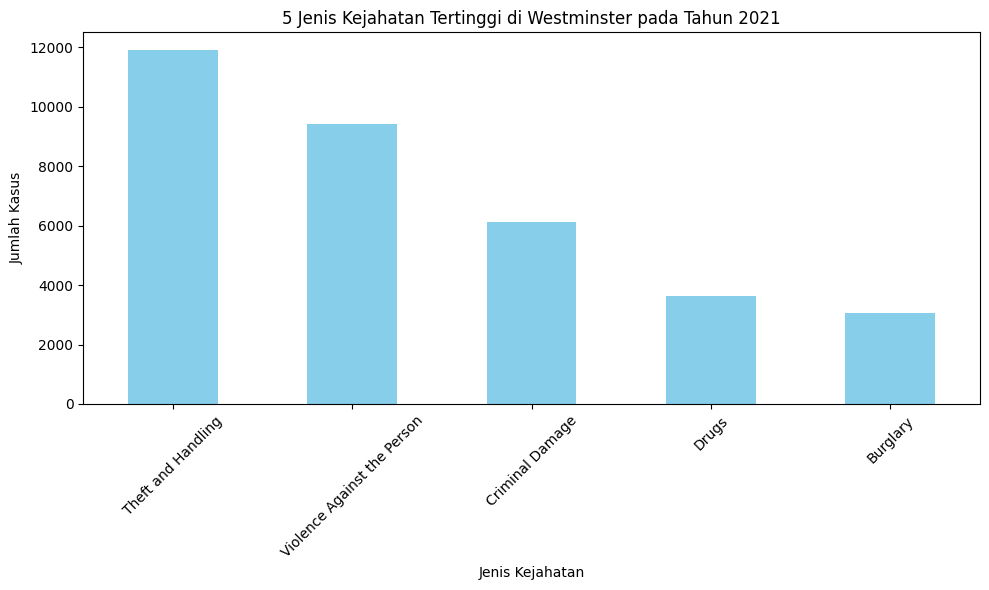

In [35]:
# Konversi kolom "year" ke tipe data datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Filter data untuk tahun 2021 dan borough Westminster
data_westminster_2021 = df[(df['year'].dt.year == 2012) & (df['borough'] == 'Westminster')]

# Hitung jumlah kasus kejahatan per jenis kejahatan
jumlah_kejahatan_per_jenis = data_westminster_2021['major_category'].value_counts()

# Ambil 5 teratas
top_5_crimes = jumlah_kejahatan_per_jenis.head(5)

# Buat bar chart
plt.figure(figsize=(10, 6))
top_5_crimes.plot(kind='bar', color='skyblue')
plt.title('5 Jenis Kejahatan Tertinggi di Westminster pada Tahun 2021')
plt.xlabel('Jenis Kejahatan')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout() 

# Tampilkan bar chart
plt.show()

Bisa disimpulkan bahwa pada wilayah Westminster kejahatan yang sering dilakukan adalah pencurian

#### Apa kata-kata atau deskripsi yang paling sering muncul dalam laporan kejahatan atau deskripsi minor_category? (Bar chart dan Word Clouds)

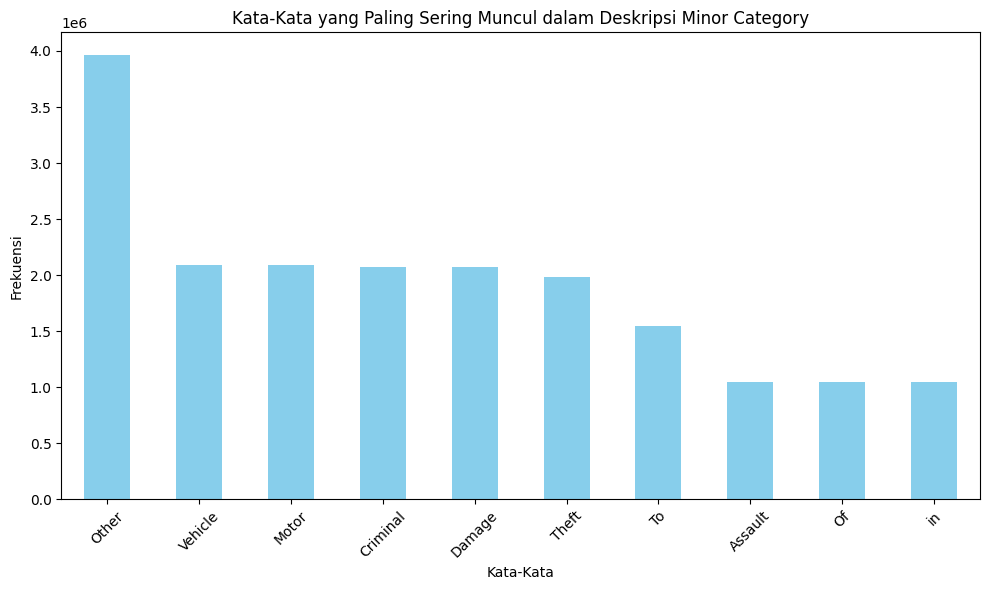

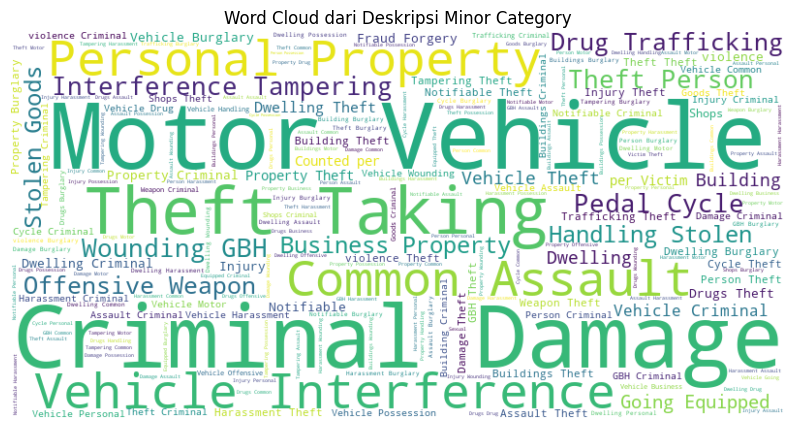

In [36]:
from wordcloud import WordCloud

# Gabungkan semua deskripsi minor_category menjadi satu teks panjang
deskripsi_minor_category = ' '.join(df['minor_category'])

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(deskripsi_minor_category)

# Buat bar chart dari kata-kata yang paling sering muncul
top_words = pd.Series(deskripsi_minor_category.split()).value_counts().head(10)

plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Kata-Kata yang Paling Sering Muncul dalam Deskripsi Minor Category')
plt.xlabel('Kata-Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Tampilkan bar chart
plt.show()

# Tampilkan juga Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud dari Deskripsi Minor Category')
plt.axis('off')
plt.show()


Kata yang sering muncul pada minor category untuk bar chart adalah "Other", sedangkan untuk word clouds adalah "Motor vehicle"

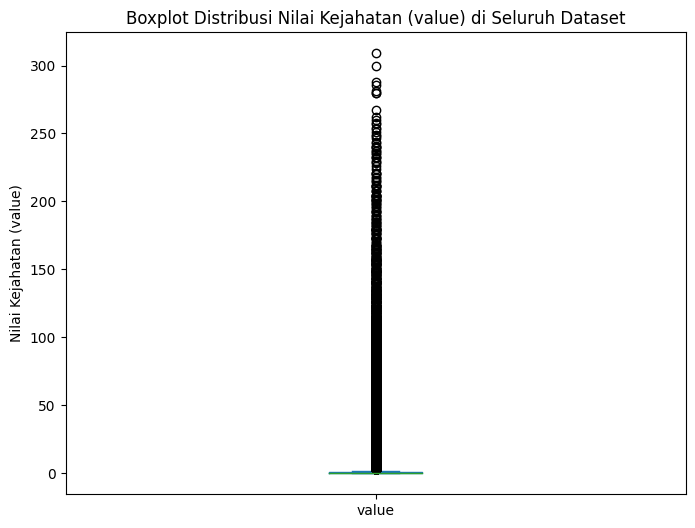

In [37]:
# Buat boxplot
plt.figure(figsize=(8, 6))
df['value'].plot(kind='box')
plt.title('Boxplot Distribusi Nilai Kejahatan (value) di Seluruh Dataset')
plt.ylabel('Nilai Kejahatan (value)')

# Tampilkan boxplot
plt.show()

#### Identifikasi tren dalam jumlah kasus kejahatan (value) dari tahun ke tahun! (Scater plot)

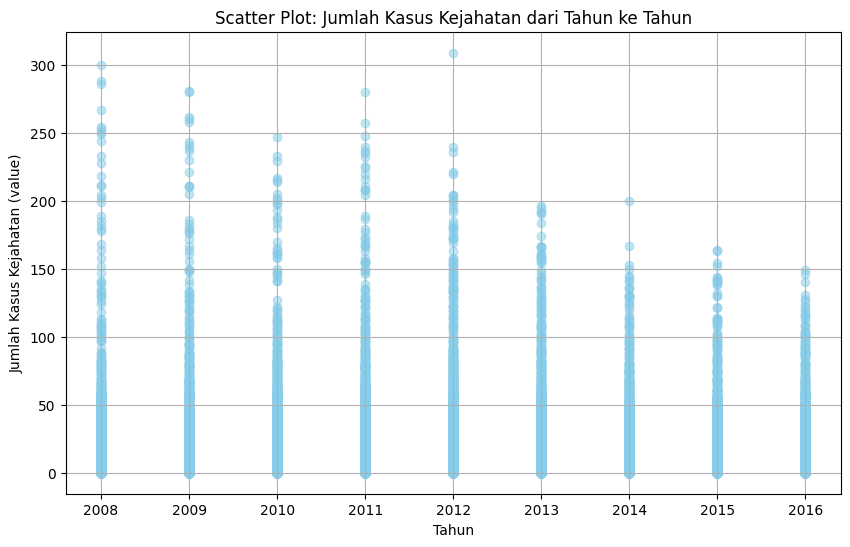

In [38]:
# Buat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['value'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot: Jumlah Kasus Kejahatan dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Kejahatan (value)')
plt.grid(True)

# Tampilkan scatter plot
plt.show()


Dari scatter plot diatas bisa dilihat bahwa jumlah kasus kejahatan yang paling banyak adalah pada tahun 2012

In [39]:
df.shape

(13490604, 7)

In [40]:
limit = 100
df_incidents = df.iloc[:limit, :]

In [41]:
latitude = 37.77
longitude = -122.42

In [42]:
import folium

safran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
safran_map